# Exploring and Debugging(Hopefully) The raw intensity calculation
This method should store the simulation data as a massive table of detector co-ordinates and partial path for each photon in each layer. This should 1-to-1 match the other processing pipeline I have

In [1]:
from inverse_modelling_tfo.data.generate_intensity import intensity_from_distribution, intensity_from_raw
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## PhotonW function(MCX) compared against my Implementation


In [2]:
photonw = Path(r'../data/raw/photonw.csv')
raw = Path(r'..\data\raw\fa_1_wv_1_sa_0.1_ns_1_ms_5.pkl')

In [3]:
# Checking Lenghts
simulation_data = pd.read_csv(photonw)

# Check Lenghts
print(f'PhotonW length {len(simulation_data)}')
print(f'Raw length {len(pd.read_pickle(raw))}')


PhotonW length 5522912
Raw length 5522912


In [4]:
# Processing Photonw
# Convert X,Y, Z co-ordinates to SDD
varying_coordinate = 'X' if len(simulation_data['X'].unique()) > 1 else 'Y'
fixed_coordinate = 'X' if varying_coordinate == 'Y' else 'Y'
source_coordinate = simulation_data[fixed_coordinate][0]
simulation_data['SDD'] = (simulation_data[varying_coordinate] - source_coordinate).astype(np.int32)  # in mm
simulation_data.drop(['X', 'Y', 'Z'], axis=1, inplace=True)

# Sum per detector
simulation_data = simulation_data.groupby(['SDD'])['Intensities'].sum()

# Rename and create df
simulation_data.name = "Intensity"
simulation_data = simulation_data.to_frame().reset_index()

In [5]:
mu_map_raw = {1: 0.017, 2: 0.0085, 3: 0.016, 4: 0.0125, 5: 0.0157, 6: 0.0175, 7: 0.15058259000000002, 8: 0.0187}
raw_intensity_data = intensity_from_raw(raw, mu_map_raw)

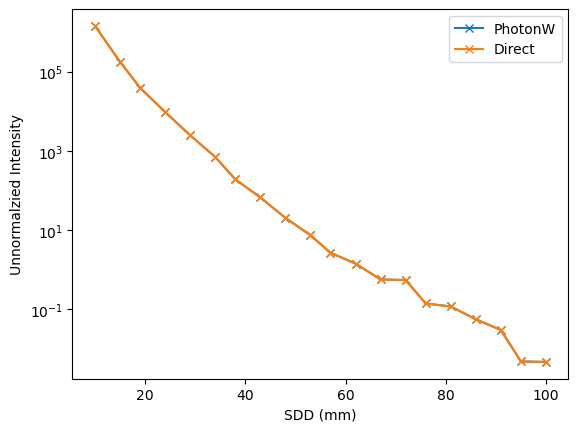

In [6]:
plt.figure()
plt.plot(simulation_data['SDD'], simulation_data['Intensity'], label="PhotonW", marker='x')
plt.plot(raw_intensity_data['SDD'], raw_intensity_data['Intensity'], label="Direct", marker='x')


plt.xlabel('SDD (mm)')
plt.ylabel('Unnormalzied Intensity')
plt.yscale('log')
plt.legend()
plt.show()
